In [1]:
# pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

In [1]:
import os
import time
import uuid
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
import json
import numpy as np

In [2]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [11]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [3]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [4]:
images.as_numpy_iterator().next()

b'data\\images\\455f72eb-a3e9-11ed-9485-48ba4e89b37b.jpg'

In [5]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [6]:
images = images.map(load_image)

In [7]:
images.as_numpy_iterator().next()

array([[[138, 135, 116],
        [139, 136, 117],
        [139, 138, 118],
        ...,
        [186, 195, 192],
        [182, 191, 186],
        [173, 182, 177]],

       [[138, 135, 116],
        [139, 136, 117],
        [139, 138, 118],
        ...,
        [182, 191, 188],
        [177, 186, 181],
        [167, 176, 171]],

       [[139, 138, 118],
        [139, 138, 118],
        [140, 139, 121],
        ...,
        [180, 189, 186],
        [173, 182, 177],
        [163, 172, 167]],

       ...,

       [[196, 188, 175],
        [196, 189, 173],
        [196, 187, 172],
        ...,
        [124, 131, 123],
        [124, 131, 123],
        [125, 132, 124]],

       [[193, 184, 169],
        [192, 183, 168],
        [194, 182, 168],
        ...,
        [123, 131, 120],
        [124, 130, 120],
        [124, 130, 120]],

       [[190, 181, 166],
        [189, 180, 165],
        [191, 179, 163],
        ...,
        [122, 130, 119],
        [123, 129, 119],
        [123, 129, 119]]

In [8]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [9]:
image_generator = images.batch(4).as_numpy_iterator()

In [11]:
plot_images = image_generator.next()

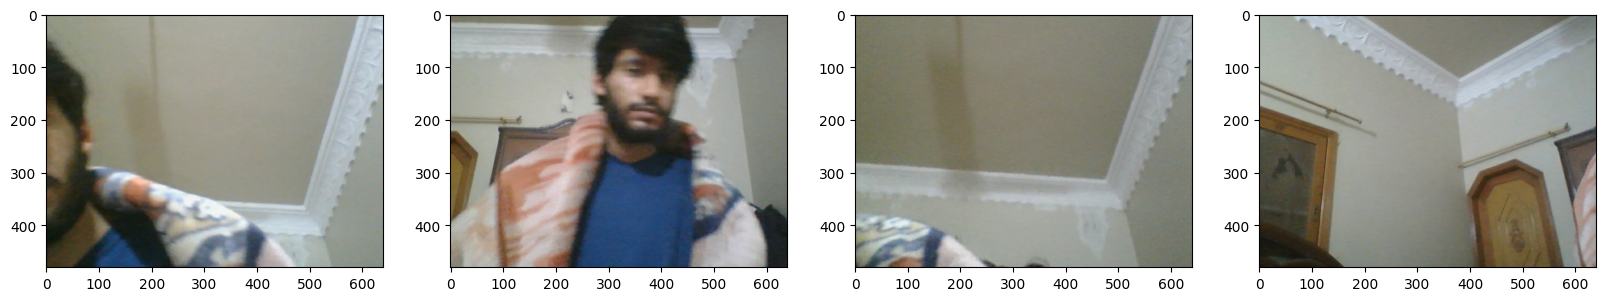

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [15]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)     